In [1]:
#source code: https://dev.to/leading-edje/machine-learning-and-wine-quality-finding-a-good-wine-using-multiple-classifications-4kho

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

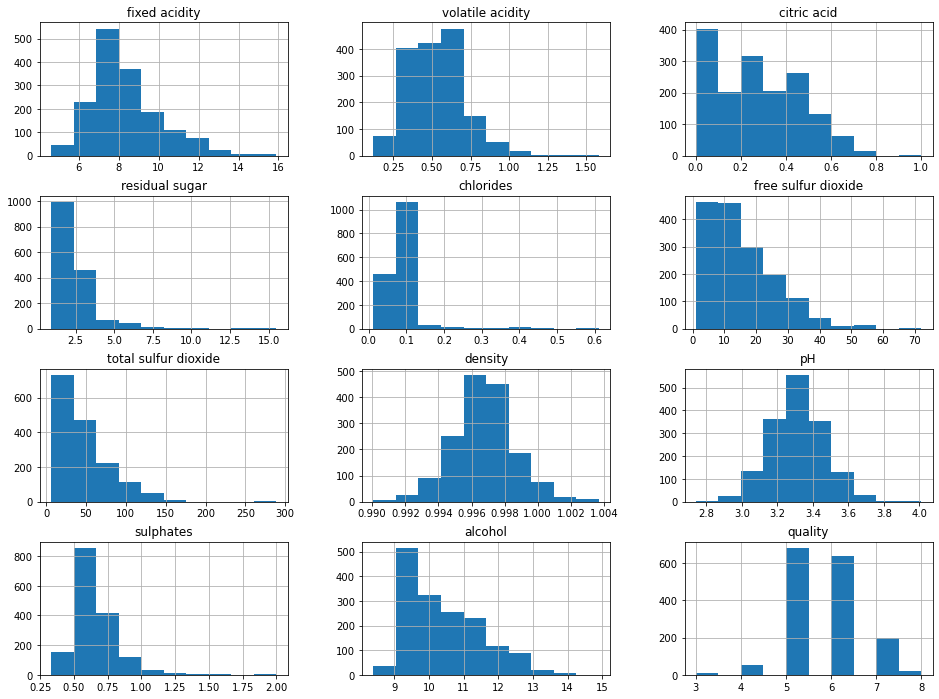

In [9]:
df_hists = df.hist()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

<AxesSubplot:>

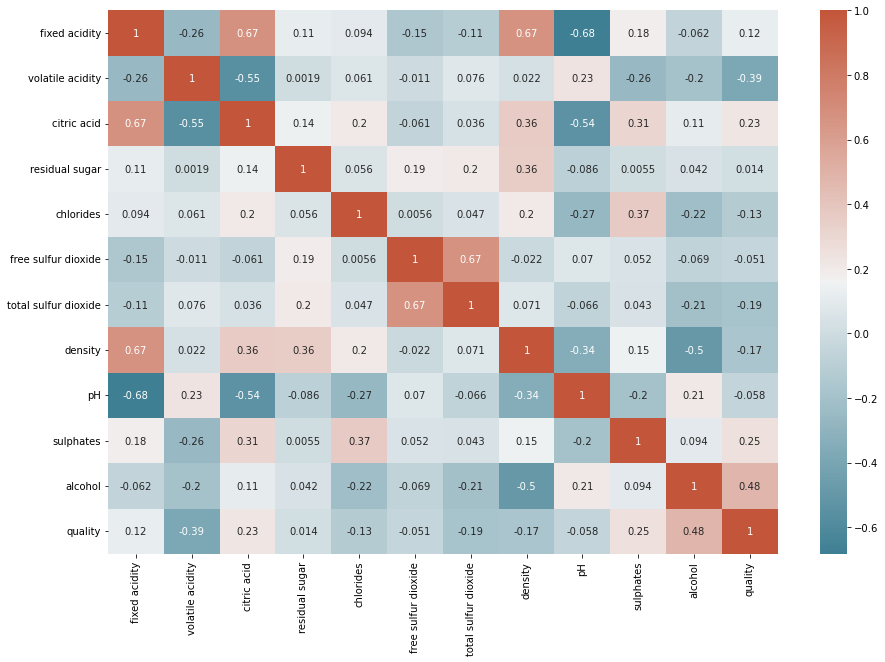

In [8]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True)
           )

<h3>Classification version of target variable</h3>

In [10]:
df['goodquality'] = [1 if x >= 8 else 0 for x in df['quality']]

In [11]:
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [12]:
df['goodquality'].value_counts()

0    1581
1      18
Name: goodquality, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

/Users/krzysiu/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [14]:
X_features = X
X = StandardScaler().fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h3>Decision Tree Classifier</h3>

In [16]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       317
           1       0.00      0.00      0.00         3

    accuracy                           0.97       320
   macro avg       0.50      0.49      0.49       320
weighted avg       0.98      0.97      0.97       320



<h3>Random Forest</h3>

In [18]:
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       317
           1       0.00      0.00      0.00         3

    accuracy                           0.99       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.98      0.99      0.99       320



/Users/krzysiu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krzysiu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krzysiu/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h3>AdaBoost</h3>

In [20]:
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.00      0.00      0.00         3

    accuracy                           0.98       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.98      0.98      0.98       320



<h3>Gradient Boosting</h3>

In [22]:
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.00      0.00      0.00         3

    accuracy                           0.98       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.98      0.98      0.98       320



<h3>XGBoost</h3>

In [24]:
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)

[23:20:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/krzysiu/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [25]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       317
           1       0.00      0.00      0.00         3

    accuracy                           0.98       320
   macro avg       0.50      0.50      0.50       320
weighted avg       0.98      0.98      0.98       320



Random Forest:


<AxesSubplot:>

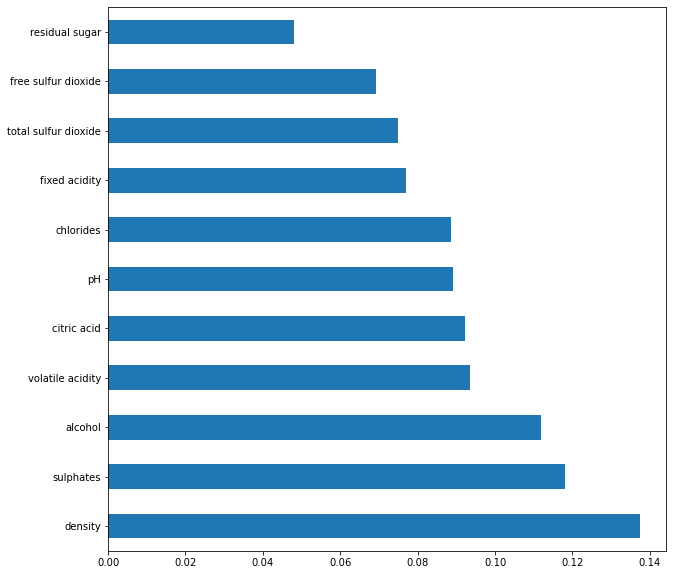

In [26]:
print('Random Forest:')
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

XGBoost:


<AxesSubplot:>

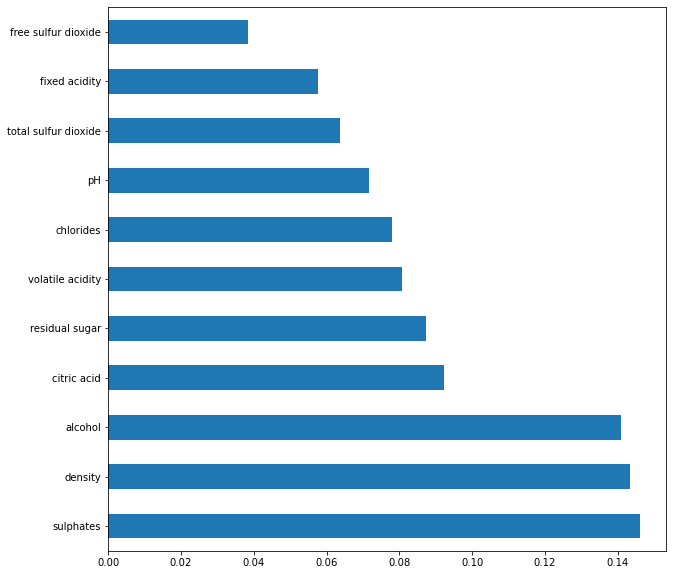

In [27]:
print('XGBoost:')
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [28]:
df_temp = df[df['goodquality']==1]
df_temp.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0
mean,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444,8.0,1.0
std,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011,0.0,0.0
min,5.000000,0.260000,0.030000,1.400000,0.044000,3.000000,12.000000,0.990800,2.880000,0.630000,9.800000,8.0,1.0
25%,7.250000,0.335000,0.302500,1.800000,0.062000,6.000000,16.000000,0.994175,3.162500,0.690000,11.325000,8.0,1.0
50%,8.250000,0.370000,0.420000,2.100000,0.070500,7.500000,21.500000,0.994940,3.230000,0.740000,12.150000,8.0,1.0
75%,10.225000,0.472500,0.530000,2.600000,0.075500,16.500000,43.000000,0.997200,3.350000,0.820000,12.875000,8.0,1.0
max,12.600000,0.850000,0.720000,6.400000,0.086000,42.000000,88.000000,0.998800,3.720000,1.100000,14.000000,8.0,1.0


In [29]:
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.0
mean,8.316825,0.529010,0.269608,2.538362,0.087683,15.904491,46.616066,0.996764,3.311613,0.656901,10.403953,5.609108,0.0
std,1.736924,0.179097,0.194384,1.411553,0.047273,10.452017,32.947171,0.001875,0.153790,0.169641,1.048940,0.771497,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.100000,6.000000,0.0
75%,9.200000,0.640000,0.420000,2.600000,0.091000,21.000000,62.000000,0.997860,3.400000,0.730000,11.000000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,7.000000,0.0
